In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataframe
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
# Print all column names
print(df.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [8]:
# Get a concise summary of the dataframe
print(df.info())

# Check for any missing values in the dataframe
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

In [9]:
# Assuming 'Outcome' is the target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7467532467532467


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter from default (100) to 1000

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7532467532467533


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model with increased iterations
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7532467532467533


In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X_test['some_feature'], y_test, color='red', label='Actual')
plt.scatter(X_test['some_feature'], predictions, color='blue', label='Predicted')
plt.legend()
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x600 with 0 Axes>

In [15]:
print(type(X_test))
print(X_test.columns)  # This line will work only if X_test is a DataFrame

<class 'numpy.ndarray'>


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

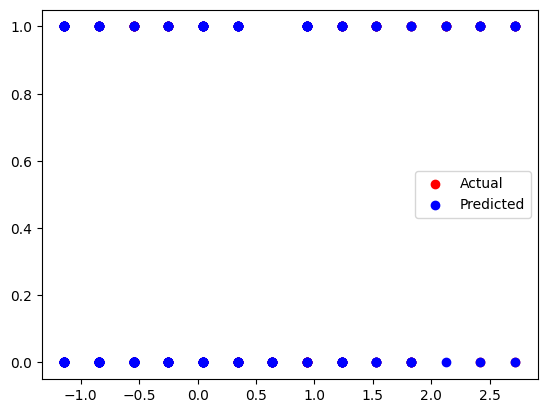

In [16]:
plt.scatter(X_test[:, 0], y_test, color='red', label='Actual')  # Adjust the index as necessary
plt.scatter(X_test[:, 0], predictions, color='blue', label='Predicted')
plt.legend()
plt.show()

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

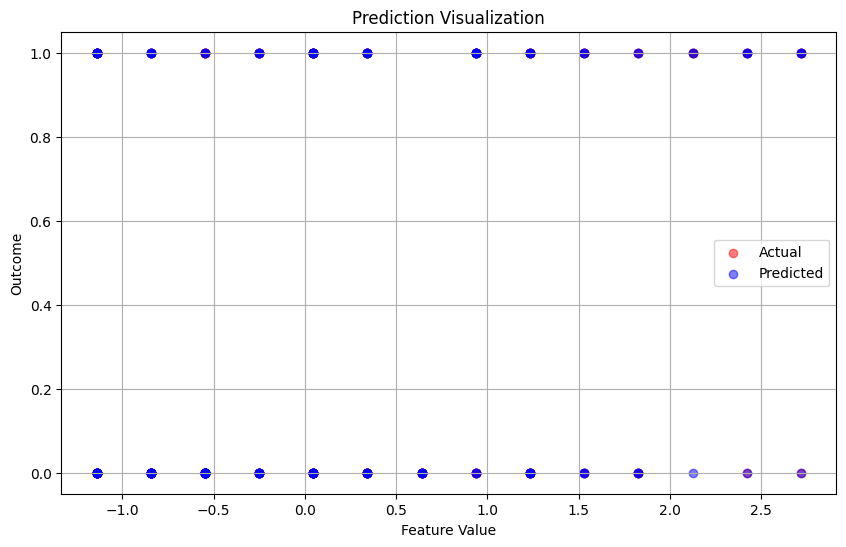

In [18]:
# Assuming 'feature_index' is the index of a meaningful feature
plt.figure(figsize=(10,6))
plt.scatter(X_test[:, 0], y_test, color='red', label='Actual', alpha=0.5)
plt.scatter(X_test[:, 0], predictions, color='blue', label='Predicted', alpha=0.5)
plt.xlabel('Feature Value')
plt.ylabel('Outcome')
plt.title('Prediction Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have already your predictions and y_test available
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [20]:
!pip install seaborn

  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.8 MB/s eta 0:00:00a 0:00:01
Using cached matplotlib-3.9.0-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Us